## Regressão Logística passo a passo - 2D 

In [1]:
import warnings
warnings. filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Base de dados :

In [3]:
N = 100

D = 2

classes = 2

N_per_class = N // classes

eps = np.finfo(float).eps

In [4]:
X = np.random.randn(N,D)

X[:N_per_class,:] = X[:N_per_class,:] - 2*np.ones((N_per_class,D))

X[N_per_class:,:] = X[N_per_class:,:] + 2*np.ones((N_per_class,D))

print(X[:10])

[[ 0.0383096  -1.92677598]
 [-0.72947823 -1.32190326]
 [-0.26992647 -1.86193868]
 [-1.02657927 -2.53819827]
 [-1.3908682  -2.42688   ]
 [-2.46215326 -1.6693643 ]
 [-0.2988183  -3.33557223]
 [-2.63876403 -1.39200345]
 [-2.03297041 -2.07528178]
 [-2.595941   -1.96152329]]


## Preparação da base de dados para utilização no classificador :

## Features :

In [5]:
ones = np.ones((N, 1))

Xb = np.concatenate((ones, X), axis=1)

print(Xb[:10])

[[ 1.          0.0383096  -1.92677598]
 [ 1.         -0.72947823 -1.32190326]
 [ 1.         -0.26992647 -1.86193868]
 [ 1.         -1.02657927 -2.53819827]
 [ 1.         -1.3908682  -2.42688   ]
 [ 1.         -2.46215326 -1.6693643 ]
 [ 1.         -0.2988183  -3.33557223]
 [ 1.         -2.63876403 -1.39200345]
 [ 1.         -2.03297041 -2.07528178]
 [ 1.         -2.595941   -1.96152329]]


In [6]:
Xb.shape

(100, 3)

## Classes :

In [7]:
Y = np.array([0]*N_per_class + [1]*N_per_class)

print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [8]:
Y.shape

(100,)

## Visualização das classes :

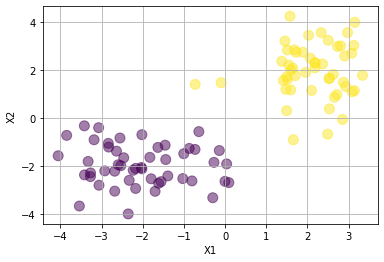

In [9]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()

### Machine Learning "From scratch"

Modelo Matemático:

$x_1, x_2 \rightarrow{}$ features

$y \rightarrow{}$ target

$\sigma(z)=\frac{1}{1+e^{-z}}$ $\rightarrow{}$ função "Logistic" ou "Sigmoid"

$\hat{y_{i}} = \sigma (w_2x_{2}^{(i)}+w_1x_{1}^{(i)}+w_0x_{0}^{(i)}) = \sigma(w^{T}x^{(i)})$ $\rightarrow{}$ target estimado

$\sigma(\hat{y_{i}})> 0,5$ $\rightarrow{}$ feature pertence a classe $1$

$\sigma(\hat{y_{i}})\leq 0,5$ $\rightarrow{}$ feature pertence a classe $0$

$Custo(\hat{y_{i}})= -\sum_{i=1}^{N}[y_{i}log(\hat{y}_{i}) + (1-y_{i})log(1-\hat{y}_{i})]) \rightarrow{}$ função custo para o classificador estimado "Cross Entropy"

$Custo(\hat{y_{i}})= Custo(w_{2}, w_{1}, w_{0}) = -\sum_{i=1}^{N}[y_{i}log(\sigma(w^{T}x^{(i)})) + (1-y_{i})log(1-\sigma(w^{T}x^{(i)}))]) \rightarrow{}$ função custo para o classificador estimado

$\frac{\partial (Custo)}{\partial w_{0}} = \sum_{i=1}^{N}[\sigma(w^{T}x^{(i)})-y_{i}]x_{0}^{(i)} \rightarrow{}$ derivada parcial da função custo em relação ao parâmetro $w_{0}$ do classificador

$\frac{\partial (Custo)}{\partial w_{1}} = \sum_{i=1}^{N}[\sigma(w^{T}x^{(i)})-y_{i}]x_{1}^{(i)} \rightarrow{}$ derivada parcial da função custo em relação ao parâmetro $w_{1}$ do classificador

$\frac{\partial (Custo)}{\partial w_{2}} = \sum_{i=1}^{N}[\sigma(w^{T}x^{(i)})-y_{i}]x_{2}^{(i)} \rightarrow{}$ derivada parcial da função custo em relação ao parâmetro $w_{2}$ do classificador

$\frac{\partial (Custo)}{\partial w_{0}} = 0 \rightarrow$ ponto de mínimo da função custo em relação ao parâmetro $w_{0}$

$\frac{\partial (Custo)}{\partial w_{1}} = 0 \rightarrow$ ponto de mínimo da função custo em relação ao parâmetro $w_{1}$

$\frac{\partial (Custo)}{\partial w_{2}} = 0 \rightarrow$ ponto de mínimo da função custo em relação ao parâmetro $w_{2}$

Modelo computacional:

- escolher parâmetros inciais $w_{2}$, $w_{1}$ e $w_{0}$
- calcular $\hat{y_{i}}$ para todas as linhas da base de dados
- calcular função Custo
- atualizar os parâmetros $w_{2}$, $w_{1}$ e $w_{0}$, fazendo:

    - $w_{0} \leftarrow w_{0}-\alpha \frac{\partial (Custo)}{\partial w_{0}}$
    - $w_{1} \leftarrow w_{1}-\alpha \frac{\partial (Custo)}{\partial w_{1}}$
    - $w_{2} \leftarrow w_{2}-\alpha \frac{\partial (Custo)}{\partial w_{2}}$

## Funções do classificador :

In [10]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [11]:
def cross_entropy(Y, Y_hat):
    E = 0
    for i in range(len(Y)):
        if Y[i] == 1:
            E -= np.log(Y_hat[i] + eps)
        else:
            E -= np.log(1 - Y_hat[i] + eps)
    return E

## Inicialização e parâmetros do classificador :

In [12]:
num_iter = 300

learning_rate = 0.01

w = np.random.randn(D + 1)

print('Inicializacao dos coeficientes w do classificador =', w)

Inicializacao dos coeficientes w do classificador = [-0.44017252 -0.03043942  0.6702804 ]


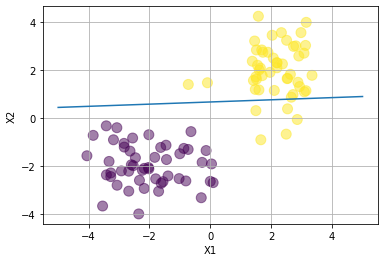

In [13]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
x_axis = np.linspace(-5, 5, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(x_axis, y_axis)
plt.grid()
plt.show()

## Algoritmo classificador passo-a-passo :

### $1^{a}$ iteração

In [14]:
Erro = []

Erro_ = []
    
Y_hat = sigmoid(Xb.dot(w))
    
w -= learning_rate * Xb.T.dot(Y_hat - Y)
    
Erro_ = Erro.append(cross_entropy(Y, Y_hat))

print("Coeficientes w do classificador após 1a iteração:", w)

Coeficientes w do classificador após 1a iteração: [-0.36170959  0.49376457  1.04224044]


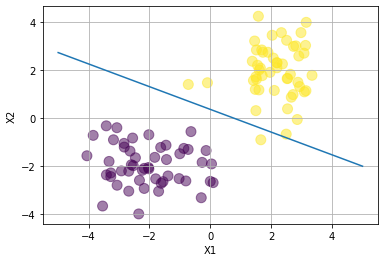

In [15]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
x_axis = np.linspace(-5, 5, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(x_axis, y_axis)
plt.grid()
plt.show()

### $2^{a}$ iteração

In [16]:
Y_hat = sigmoid(Xb.dot(w))
    
w -= learning_rate * Xb.T.dot(Y_hat - Y)
    
Erro_ = Erro.append(cross_entropy(Y, Y_hat))

print("Coeficientes w do classificador após 2a iteração:", w)

Coeficientes w do classificador após 2a iteração: [-0.33393137  0.62264861  1.1199227 ]


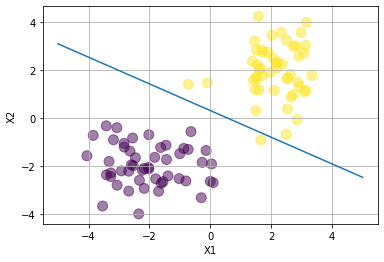

In [17]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
x_axis = np.linspace(-5, 5, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(x_axis, y_axis)
plt.grid()
plt.show()

### $3^{a}$ iteração

In [18]:
Y_hat = sigmoid(Xb.dot(w))
    
w -= learning_rate * Xb.T.dot(Y_hat - Y)
    
Erro_ = Erro.append(cross_entropy(Y, Y_hat))

print("Coeficientes w do classificador após 3a iteração:", w)

Coeficientes w do classificador após 3a iteração: [-0.31255853  0.71517733  1.17474913]


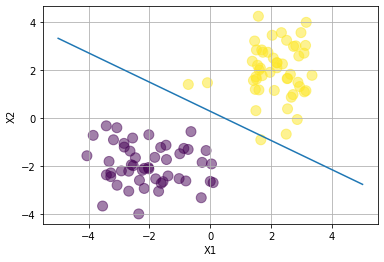

In [19]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
x_axis = np.linspace(-5, 5, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(x_axis, y_axis)
plt.grid()
plt.show()

## Algoritmo classificador :

In [20]:
Erro = []

Erro_ = []

for i in range(num_iter):
    
    Y_hat = sigmoid(Xb.dot(w))
    
    w -= learning_rate * Xb.T.dot(Y_hat - Y)
    
    Erro_ = Erro.append(cross_entropy(Y, Y_hat))

print("Coeficientes w do classificador:", w)

Coeficientes w do classificador: [0.43233276 2.56192283 2.67204955]


## Visualização do erro :

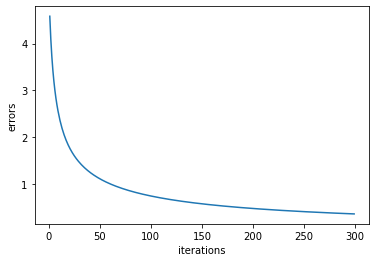

In [21]:
epochs = np.arange(1, num_iter)
plt.plot(epochs, np.array(Erro[1:]))
plt.xlabel('iterations')
plt.ylabel('errors')
plt.show()

## Visualização do classificador :

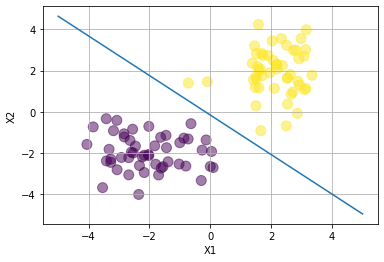

In [22]:
plt.scatter(X[:,0], X[:,1], c=Y, s=100, alpha=0.5)
x_axis = np.linspace(-5, 5, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot(x_axis, y_axis)
plt.grid()
plt.show()

## Estimador da classe :

In [24]:
novaentrada = np.array([1, 0, 0])
classe = 'Amarela' if (sigmoid(novaentrada.dot(w)) > 0.5) else 'Roxa'
print('A nova entrada pertence a classe', classe , 'com probabilidade de', 
      round(100*(sigmoid(novaentrada.dot(w))), 2),'%')

A nova entrada pertence a classe Amarela com probabilidade de 60.64 %
